In [5]:
import pandas as pd

# Load data
influx_data = pd.read_csv("influxData.csv", parse_dates=['Time'])
postgis_data = pd.read_csv("postGisData.csv")

# # Display first few rows of each dataset
# print("Influx Data:")
# print(influx_data.head())
# print("\nPostGIS Data:")
# print(postgis_data.head())

# Basic statistics of influx data
print("\nBasic statistics of Influx Data:")
# print(influx_data.describe())
print(len(influx_data))

# Basic statistics of postgis data
print("\nBasic statistics of PostGIS Data:")
print(postgis_data.describe())

# Merge data on Station ID
merged_data = pd.merge(influx_data, postgis_data, left_on='Station ID', right_on='station_id')
print(len(merged_data))

# Display merged data
print("\nMerged Data:")
print(merged_data.head())





Basic statistics of Influx Data:
433455

Basic statistics of PostGIS Data:
       station_id  elevation
count    20.00000  20.000000
mean     10.50000  46.200000
std       5.91608  15.879812
min       1.00000  26.000000
25%       5.75000  30.250000
50%      10.50000  52.000000
75%      15.25000  57.500000
max      20.00000  70.000000
433455

Merged Data:
                       Time  Station ID     Field  Value  station_id  \
0 2023-01-01 00:00:00+00:00           1  Humidity  40.31           1   
1 2023-01-01 00:01:00+00:00           1  Humidity  56.67           1   
2 2023-01-01 00:02:00+00:00           1  Humidity  16.55           1   
3 2023-01-01 00:03:00+00:00           1  Humidity  81.93           1   
4 2023-01-01 00:04:00+00:00           1  Humidity  63.93           1   

  station_name                                           location  elevation  \
0    Station A  0101000020E6100000C74CA25EF0B6464021C610A562BC...       53.0   
1    Station A  0101000020E6100000C74CA25EF0B6464

In [14]:
import matplotlib.pyplot as plt

# 1. Calculate Average humidity, temperature, precipitation by Station
humidity_data = merged_data[merged_data['Field'] == "Humidity"]
precipitation_data = merged_data[merged_data['Field'] == "Precipitation"]
temperature_data = merged_data[merged_data['Field'] == "Temperature"]
average_humidity_by_station = humidity_data.groupby('station_name')['Value'].mean()
average_precipitation_by_station = precipitation_data.groupby('station_name')['Value'].mean()
average_temperature_by_station = temperature_data.groupby('station_name')['Value'].mean()
print("\nAverage Humidity by Station:")
print(average_humidity_by_station)


Average Humidity by Station:
station_name
Station A    50.045787
Station B    50.086085
Station C    50.253802
Station D    49.872604
Station E    50.004842
Name: Value, dtype: float64


144485
144485
433455


144485

In [15]:
# 2. Find Stations with Highest and Lowest Average
# 2.1 Humidity
station_with_highest_humidity = average_humidity_by_station.idxmax()
station_with_lowest_humidity = average_humidity_by_station.idxmin()

highest_humidity = average_humidity_by_station.max()
lowest_humidity = average_humidity_by_station.min()

print("\nStation with Highest Average Humidity:", station_with_highest_humidity)
print("Highest Average Humidity:", highest_humidity)

print("\nStation with Lowest Average Humidity:", station_with_lowest_humidity)
print("Lowest Average Humidity:", lowest_humidity)

# 2.2 Precipitation
station_with_highest_precipitation = average_precipitation_by_station.idxmax()
station_with_lowest_precipitation = average_precipitation_by_station.idxmin()

highest_precipitation = average_precipitation_by_station.max()
lowest_precipitation = average_precipitation_by_station.min()

print("\nStation with Highest Average Precipitation:", station_with_highest_precipitation)
print("Highest Average Precipitation:", highest_precipitation)

print("\nStation with Lowest Average Precipitation:", station_with_lowest_precipitation)
print("Lowest Average Precipitation:", lowest_precipitation)

# 2.3 Temperature
station_with_highest_temperature =average_temperature_by_station.idxmax()
station_with_lowest_temperature = average_temperature_by_station.idxmin()

highest_temperature = average_temperature_by_station.max()
lowest_temperature = average_temperature_by_station.min()

print("\nStation with Highest Average Temperature:", station_with_highest_temperature)
print("Highest Average Temperature:", highest_temperature)

print("\nStation with Lowest Average Temperature:", station_with_lowest_temperature)
print("Lowest Average Temperature:", lowest_temperature)



Station with Highest Average Humidity: Station C
Highest Average Humidity: 50.25380151099652

Station with Lowest Average Humidity: Station D
Lowest Average Humidity: 49.87260406076317

Station with Highest Average Precipitation: Station D
Highest Average Precipitation: 50.22305871866276

Station with Lowest Average Precipitation: Station C
Lowest Average Precipitation: 49.774521501252025

Station with Highest Average Temperature: Station A
Highest Average Temperature: 15.094008177424284

Station with Lowest Average Temperature: Station B
Lowest Average Temperature: 14.97140092296619


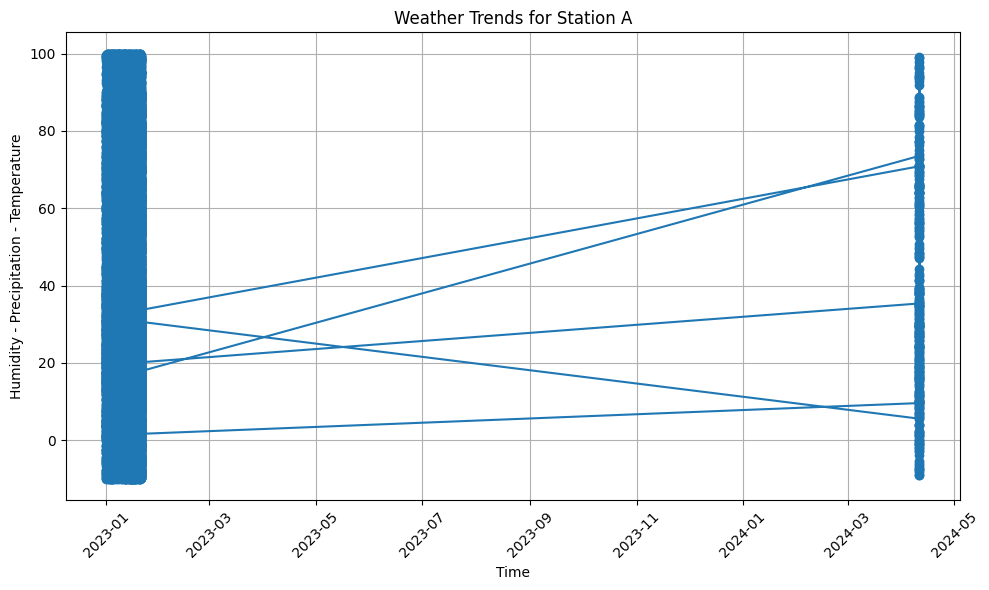

In [16]:
# 3. Visualize Trends for a Specific Station (e.g., Station A)
station_a_data = merged_data[merged_data['station_name'] == 'Station A']
plt.figure(figsize=(10, 6))
plt.plot(station_a_data['Time'], station_a_data['Value'], marker='o', linestyle='-')
plt.title('Weather Trends for Station A')
plt.xlabel('Time')
plt.ylabel('Humidity - Precipitation - Temperature')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

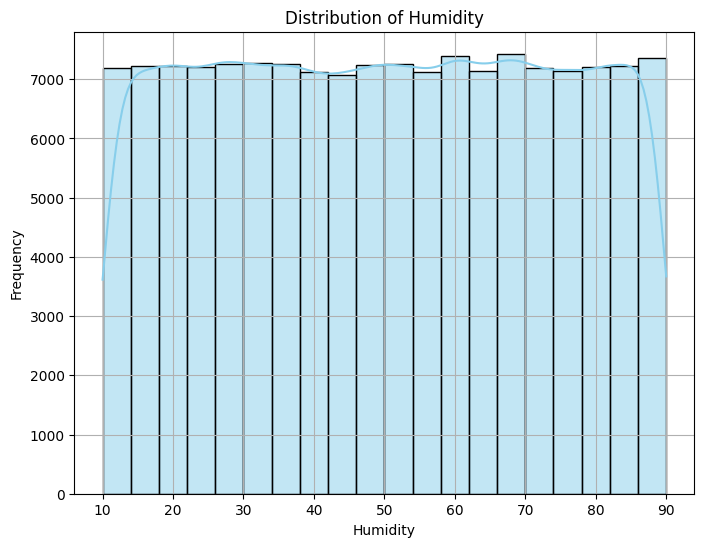

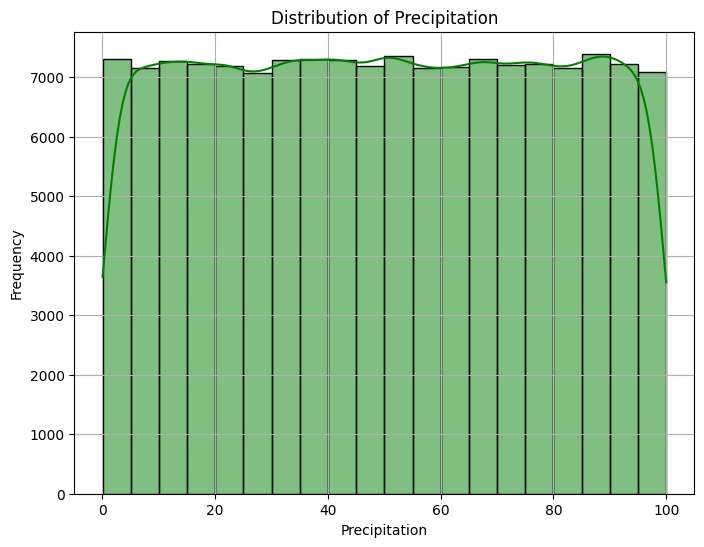

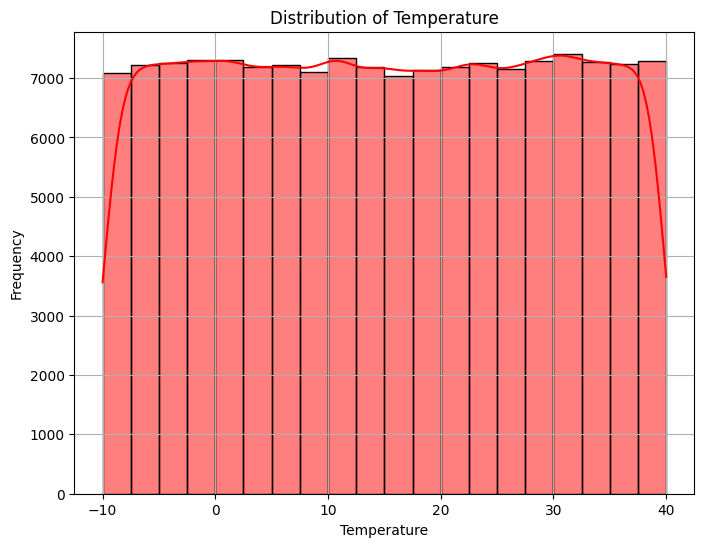

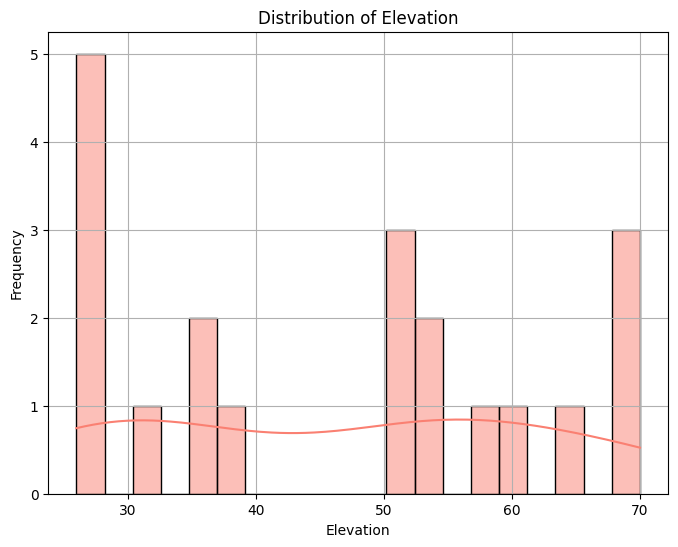

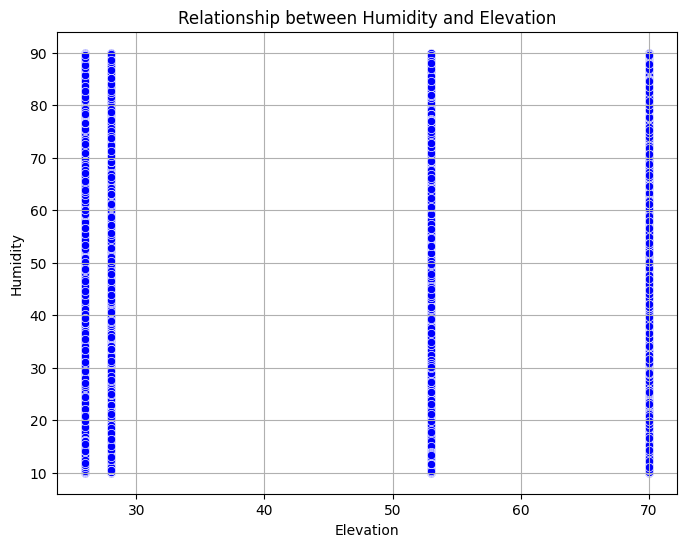

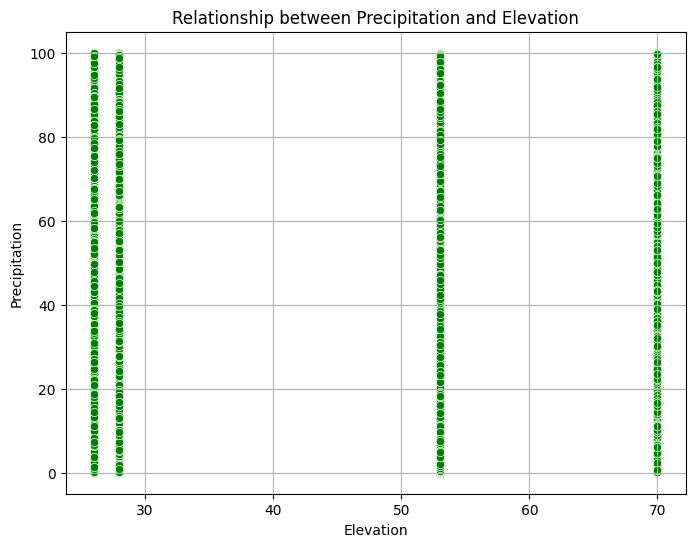

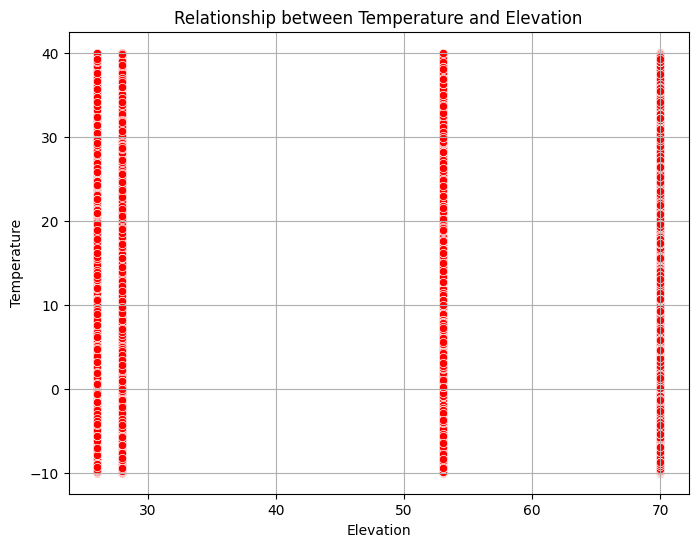

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Humidity
plt.figure(figsize=(8, 6))
sns.histplot(humidity_data['Value'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of Precipitation
plt.figure(figsize=(8, 6))
sns.histplot(precipitation_data['Value'], bins=20, kde=True, color='green')
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of Temperature
plt.figure(figsize=(8, 6))
sns.histplot(temperature_data['Value'], bins=20, kde=True, color='red')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of Elevation
plt.figure(figsize=(8, 6))
sns.histplot(postgis_data['elevation'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Elevation')
plt.xlabel('Elevation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Relationship between Humidity and Elevation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='elevation', y='Value', data=humidity_data, color='blue')
plt.title('Relationship between Humidity and Elevation')
plt.xlabel('Elevation')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()

# Relationship between Precipitation and Elevation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='elevation', y='Value', data=precipitation_data, color='green')
plt.title('Relationship between Precipitation and Elevation')
plt.xlabel('Elevation')
plt.ylabel('Precipitation')
plt.grid(True)
plt.show()

# Relationship between Temperature and Elevation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='elevation', y='Value', data=temperature_data, color='red')
plt.title('Relationship between Temperature and Elevation')
plt.xlabel('Elevation')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()
